<hr>

# Welcome to Week 6
<hr>

**Linear regrassion:** In linear regression we want to find a line similar to $h$. 

The linear equation should allow us to summarise and study relationships between two continuous (quantitative) variables.

First we are defining a line (see the figure below): $y=h(x)=wx+b$

<hr>

<img src="figure/Linear regression formulation image 2.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
 <br>

Let's say we have an E-commerce customers list with some features/attributes. Our task is to determine the yearly amount customers spend on this E-commerce site.

### Data loading

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("data/Ecommerce Customers.csv")
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

### Size of df, and dtypes of the columns

In [25]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### find null values

In [26]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### statistical analysis of datasets

In [27]:
df.describe(include=None)

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

###  Feature correlation with target

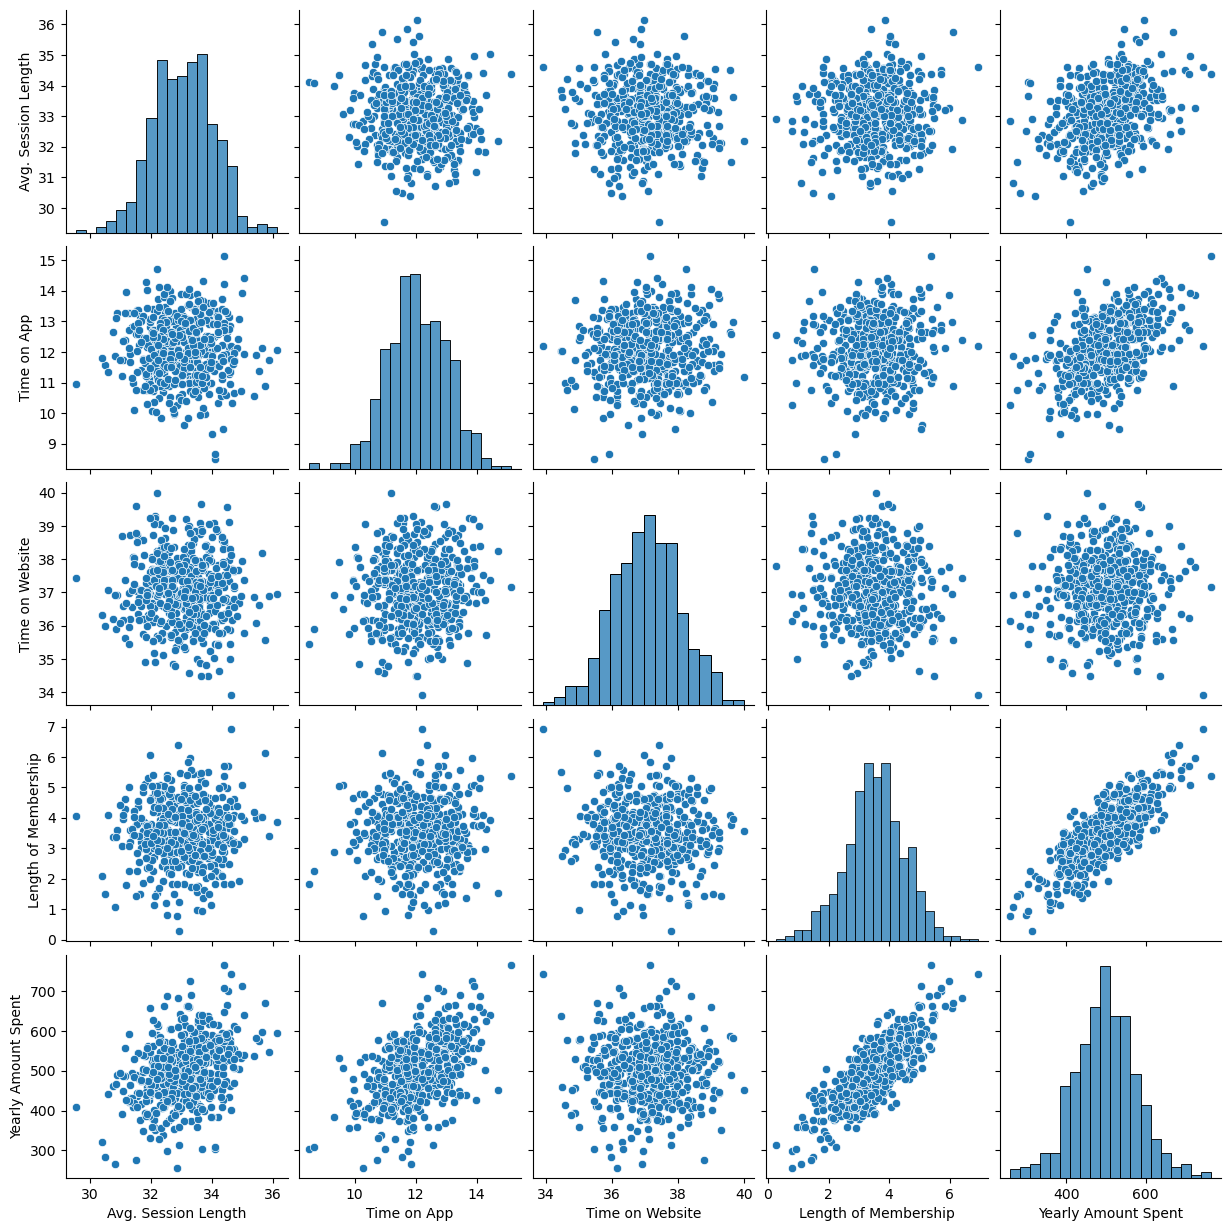

In [28]:
import seaborn as sns
sns.pairplot(df)
plt.show()

### Spliting Feature and target 

In [29]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

### Spliting training ($70\%$) and testing ($30\%$) datasets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


### Testing model performance

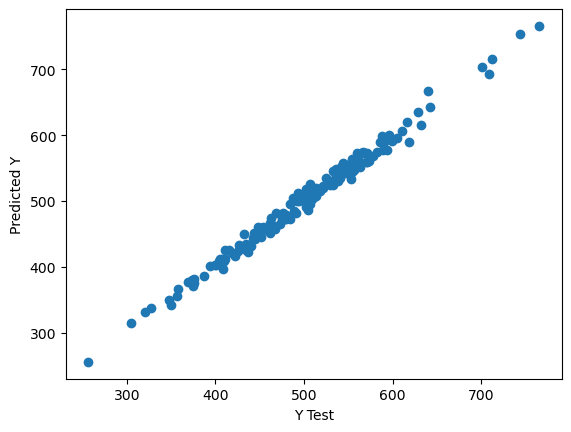

In [32]:
predictions = lm.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Evaluting model performance

In [33]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 7.228148653430832


<hr>

## Task-1
- Repeat the example with different evalution metrics 

<hr>

### Most significant feature in this datasets

In [34]:
w = pd.DataFrame(lm.coef_,X.columns)
w.columns = ['Coeffecient']
w

Coeffecient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

In [35]:
b=lm.intercept_
b

-1047.932782250239

# Logistic regrassion
Let $x$ be a data instance, and $y$ be its class label in $\{-1,1\}$.  Logistic regression does not directly model $y$ in terms $x$. Instead, it models something called logit value or log of odds against  via linear regression. So generally we are modelling log of odds based on $x$.<br>
The odds of class $-1$ is defined as:<br>

$Odds=\frac{P(y=1|x)}{1-P(y=1|x)}$

This Log of odds is called logit. Logistic regression uses the following linear model:<br>

$\log (Odds)=\log \frac{P(y=1|x)}{1-P(y=1|x)}=w_0+w_1x$

 

<hr>

<img src="figure/Logistic regression formulation image 1.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
 <br>

In [36]:
train_data=pd.read_csv("data/wisconsin_data/train_wbcd.csv")
test_data=pd.read_csv("data/wisconsin_data/test_wbcd.csv")

### train data info

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  100 non-null    int64  
 1   Diagnosis   100 non-null    object 
 2   f1          100 non-null    float64
 3   f2          100 non-null    float64
 4   f3          100 non-null    float64
 5   f4          100 non-null    float64
 6   f5          100 non-null    float64
 7   f6          100 non-null    float64
 8   f7          100 non-null    float64
 9   f8          100 non-null    float64
 10  f9          100 non-null    float64
 11  f10         100 non-null    float64
 12  f11         100 non-null    float64
 13  f12         100 non-null    float64
 14  f13         100 non-null    float64
 15  f14         100 non-null    float64
 16  f15         100 non-null    float64
 17  f16         100 non-null    float64
 18  f17         100 non-null    float64
 19  f18         100 non-null    fl

### Generate statistics

In [38]:
train_data.describe()

Patient_ID          f1          f2          f3           f4  \
count  1.000000e+02  100.000000  100.000000  100.000000   100.000000   
mean   1.160791e+07   14.225920   19.207900   92.722600   666.375000   
std    2.737600e+07    3.729963    4.732476   25.924925   366.768846   
min    8.670000e+03    7.729000   10.820000   47.980000   178.800000   
25%    8.650350e+05   11.880000   15.607500   75.667500   430.825000   
50%    9.013015e+05   13.600000   18.805000   87.355000   572.050000   
75%    2.821689e+06   15.707500   21.917500  103.650000   768.325000   
max    9.197970e+07   25.220000   32.470000  171.500000  1878.000000   

               f5          f6          f7          f8          f9  ...  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
mean     0.095696    0.106129    0.090364    0.049346    0.179893  ...   
std      0.013496    0.057694    0.084449    0.042066    0.027482  ...   
min      0.068830    0.023440    0.000000    0.000000    0.106000  ...   
25%      0.084645    0.062065    0.025070    0.019017    0.161700  ...   
50%      0.094985    0.096485    0.066145    0.032565    0.179700  ...   
75%      0.103825    0.130025    0.135875    0.076825    0.193400  ...   
max      0.132600    0.311400    0.426400    0.184500    0.255600  ...   

             f21         f22         f23          f24         f25         f26  \
count  98.000000  100.000000  100.000000   100.000000  100.000000  100.000000   
mean   16.486765   25.380800  108.925200   909.191000    0.132563    0.265144   
std     5.250147    6.689072   36.432902   597.843396    0.022108    0.161632   
min     9.077000   14.100000   57.170000   248.000000    0.071170    0.027290   
25%    13.052500   19.510000   84.055000   514.925000    0.119275    0.156575   
50%    15.315000   25.670000   98.245000   727.100000    0.134300    0.237700   
75%    19.147500   30.870000  125.450000  1110.250000    0.147875    0.357050   
max    31.010000   45.410000  211.700000  2944.000000    0.187800    0.758400   

              f27         f28         f29         f30  
count  100.000000  100.000000  100.000000  100.000000  
mean     0.278176    0.117597    0.289196    0.083999  
std      0.210617    0.075227    0.058586    0.014823  
min      0.000000    0.000000    0.156600    0.059050  
25%      0.093762    0.060362    0.246875    0.073960  
50%      0.256650    0.104250    0.279600    0.081660  
75%      0.400900    0.173950    0.320600    0.093808  
max      0.960800    0.291000    0.475300    0.128400  

[8 rows x 31 columns]

In [39]:
train_data.head()

Patient_ID Diagnosis     f1     f2      f3      f4       f5       f6  \
0      909410         B  14.02  15.66   89.59   606.5  0.07966  0.05581   
1    84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280   
2     8912284         B  12.89  15.70   84.08   516.6  0.07818  0.09580   
3    90317302         B  10.26  12.22   65.75   321.6  0.09996  0.07542   
4      914102         B  13.16  20.54   84.06   538.7  0.07335  0.05275   

        f7       f8  ...    f21    f22     f23     f24      f25     f26  \
0  0.02087  0.02652  ...  14.91  19.31   96.53   688.9  0.10340  0.1017   
1  0.19800  0.10430  ...  22.54  16.67  152.20  1575.0  0.13740  0.2050   
2  0.11150  0.03390  ...  13.90  19.69   92.12   595.6  0.09926  0.2317   
3  0.01923  0.01968  ...  11.38  15.65   73.23   394.5  0.13430  0.1650   
4  0.01800  0.01256  ...  14.50  28.46   95.29   648.3  0.11180  0.1646   

       f27      f28     f29      f30  
0  0.06260  0.08216  0.2136  0.06710  
1  0.40000  0.16250  0.2364  0.07678  
2  0.33440  0.10170  0.1999  0.07127  
3  0.08615  0.06696  0.2937  0.07722  
4  0.07698  0.04195  0.2687  0.07429  

[5 rows x 32 columns]

### Checking class balance

C:\Users\sit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


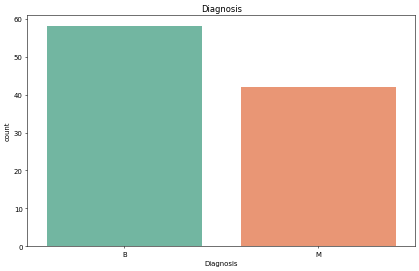

In [40]:
plt.figure(figsize=(10,6),dpi=50)
sns.countplot(train_data['Diagnosis'],palette='Set2')
plt.title('Diagnosis')
plt.show()

### Find the correlation between the features

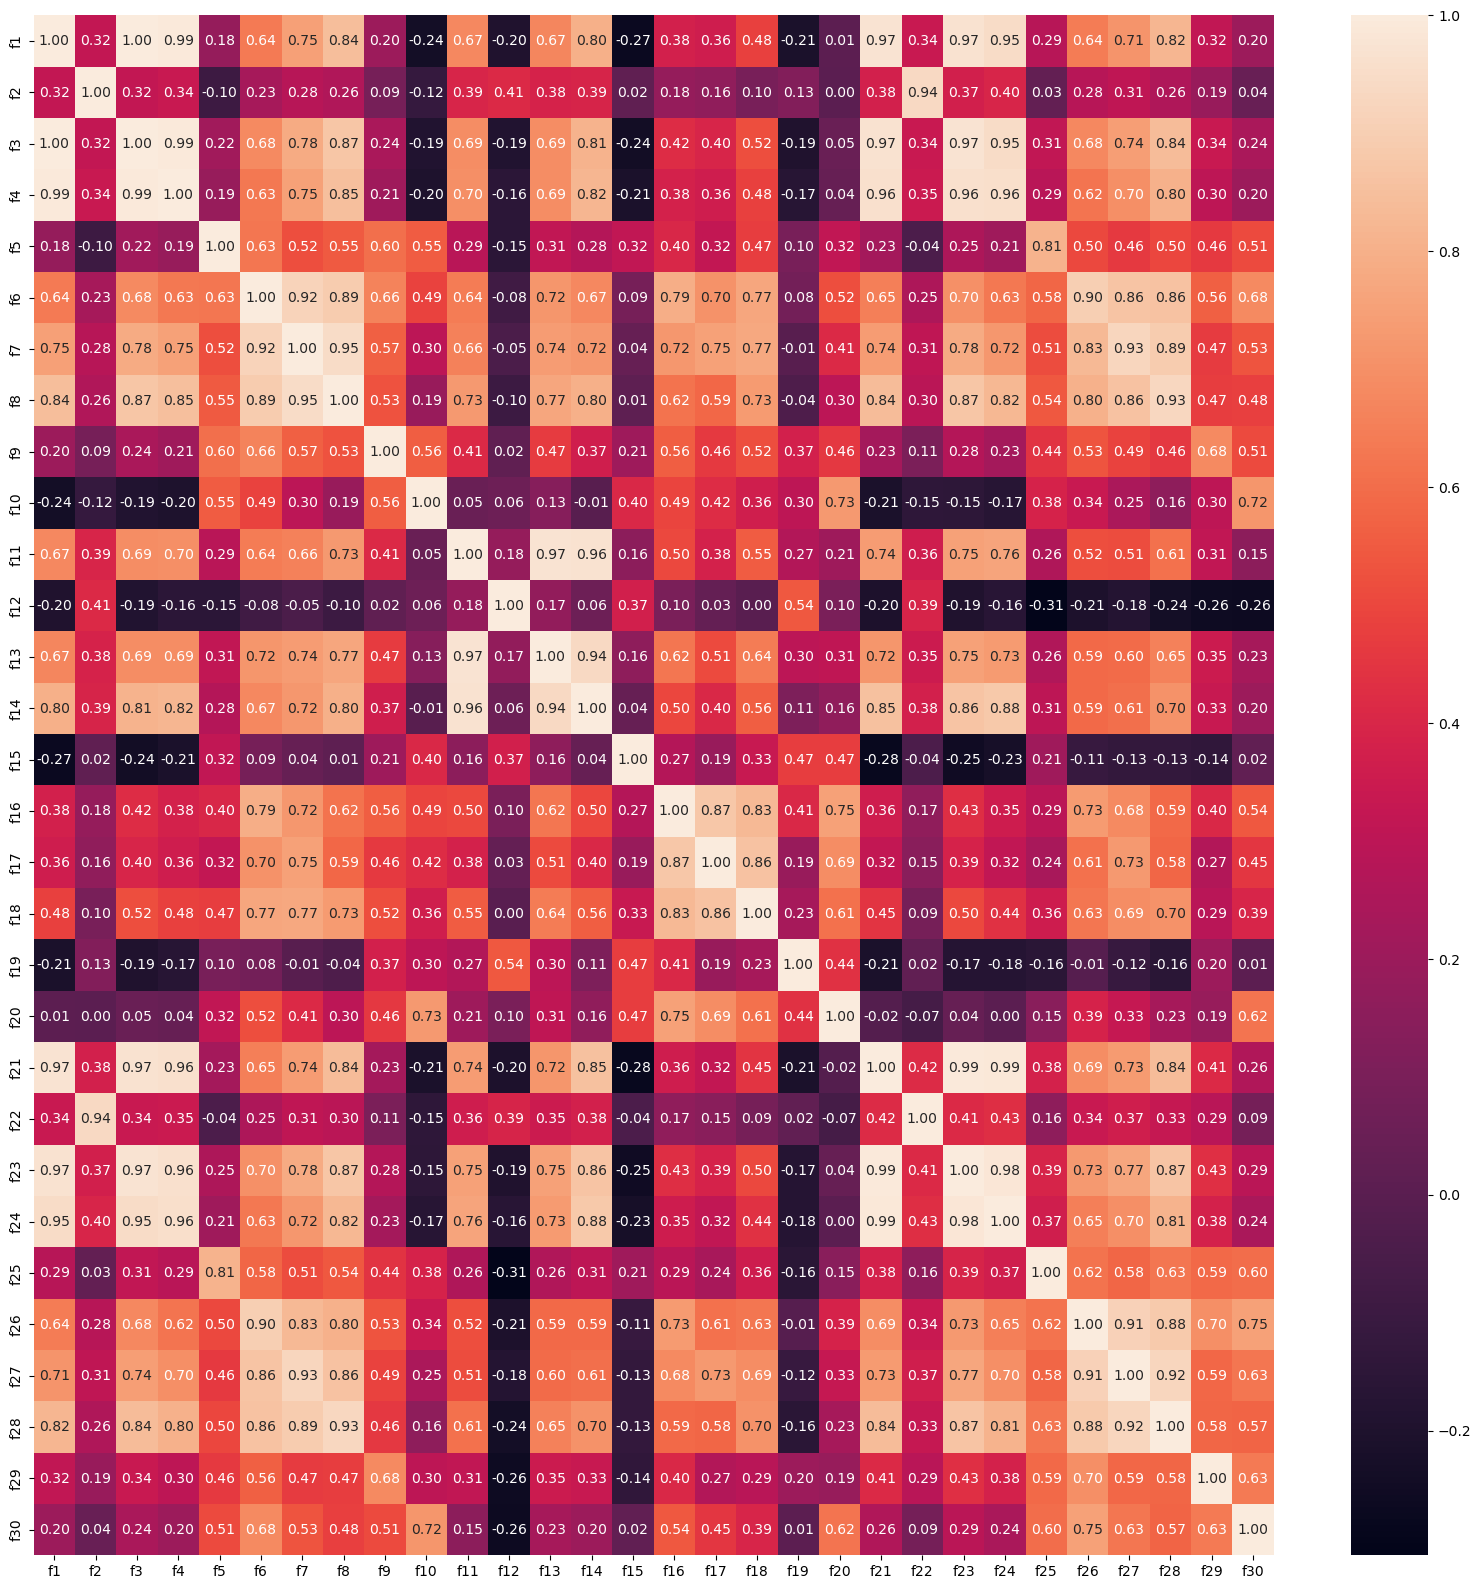

In [41]:

corr = train_data.iloc[:,1:].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Check null value

In [42]:
test_data.isna().sum()

Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           1
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
dtype: int64

In [43]:
train_data.dtypes

Patient_ID      int64
Diagnosis      object
f1            float64
f2            float64
f3            float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
f9            float64
f10           float64
f11           float64
f12           float64
f13           float64
f14           float64
f15           float64
f16           float64
f17           float64
f18           float64
f19           float64
f20           float64
f21           float64
f22           float64
f23           float64
f24           float64
f25           float64
f26           float64
f27           float64
f28           float64
f29           float64
f30           float64
dtype: object

### Train model

In [44]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
# Encode “diagnosis” to numerical values
train_data=train_data.dropna()
test_data=test_data.dropna()
# Encode “diagnosis” to numerical values
train_data['Diagnosis'] = [1 if each == 'M' else 0 for each in train_data['Diagnosis']]
test_data['Diagnosis'] = [1 if each == 'M' else 0 for each in test_data['Diagnosis']]
X_train=train_data.iloc[:,2:]
y_train=train_data.iloc[:,1]
X_test=test_data.iloc[:,2:]
y_test=test_data.iloc[:,1]
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
print("Train: ",train_data.shape)
print("Test: ",test_data.shape)

Train:  (98, 32)
Test:  (19, 32)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

#Evaluate our model
model_acc = accuracy_score(y_predict, y_test)
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Accuracy is: 0.8421052631578947
Model Coeff: [-2.09591812e-01 -1.36143322e+00 -1.93491426e-01 -2.79837963e+00
  1.95546835e-01  1.98797637e-02  1.35146931e-01  1.98252590e-01
  8.30398315e-02  4.02839523e-02  6.79710848e-04 -5.90609905e-02
 -5.65538428e-01  3.53512360e-01 -1.70845489e-01  1.67219624e-03
  3.13233944e-02  4.93710303e-02  1.26797117e-02 -4.97858708e-05
  2.74919020e-03 -1.62003805e+00  1.29460052e+00  1.59354847e+00
 -1.84185366e-02  3.88048222e-02  3.95983998e-01  5.25059609e-01
  1.65867274e-01  8.30782040e-02  2.55845262e-02]


C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

#Evaluate our model
model_acc = accuracy_score(y_predict, y_test)
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Accuracy is: 0.8421052631578947
Model Coeff: [-2.09591812e-01 -1.36143322e+00 -1.93491426e-01 -2.79837963e+00
  1.95546835e-01  1.98797637e-02  1.35146931e-01  1.98252590e-01
  8.30398315e-02  4.02839523e-02  6.79710848e-04 -5.90609905e-02
 -5.65538428e-01  3.53512360e-01 -1.70845489e-01  1.67219624e-03
  3.13233944e-02  4.93710303e-02  1.26797117e-02 -4.97858708e-05
  2.74919020e-03 -1.62003805e+00  1.29460052e+00  1.59354847e+00
 -1.84185366e-02  3.88048222e-02  3.95983998e-01  5.25059609e-01
  1.65867274e-01  8.30782040e-02  2.55845262e-02]


C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
def runLRmodel(trials, data, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,31])

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(train_data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type, solver='liblinear')
      lr.fit(Dtrain.iloc[:,2:], Dtrain[label])
      y_predict = lr.predict(Dtest.iloc[:,2:])
      model_acc += accuracy_score(y_predict, Dtest[label])
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)


In [51]:
lambda_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l2_acc = np.zeros(len(lambda_vals))
index = 0
#L2 regularization
for l in lambda_vals:
   l2_acc[index], w = runLRmodel(500,train_data, 'Diagnosis', 'l2', np.float(l))
   index += 1

print("Acc: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

C:\Users\sit\AppData\Local\Temp\ipykernel_22880\3955884565.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l2_acc[index], w = runLRmodel(500,train_data, 'Diagnosis', 'l2', np.float(l))
C:\Users\sit\AppData\Local\Temp\ipykernel_22880\3955884565.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l2_acc[index], w = runLRmodel(500,train_

Acc: [0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.94 0.94 0.93 0.93]
Best Lambda: 0.0001


In [53]:
alpha_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l1_acc = np.zeros(len(alpha_vals))
index = 0
#L2 regularization
for l in alpha_vals:
   l1_acc[index], w = runLRmodel(500,train_data, 'Diagnosis', 'l1', np.float(l))
   index += 1

print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

C:\Users\sit\AppData\Local\Temp\ipykernel_22880\1812579931.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l1_acc[index], w = runLRmodel(500,train_data, 'Diagnosis', 'l1', np.float(l))
C:\Users\sit\AppData\Local\Temp\ipykernel_22880\1812579931.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l1_acc[index], w = runLRmodel(500,train_

Acc: [0.95 0.95 0.96 0.96 0.96 0.95 0.96 0.96 0.94 0.92 0.92 0.91]
Best Alpha: 0.001


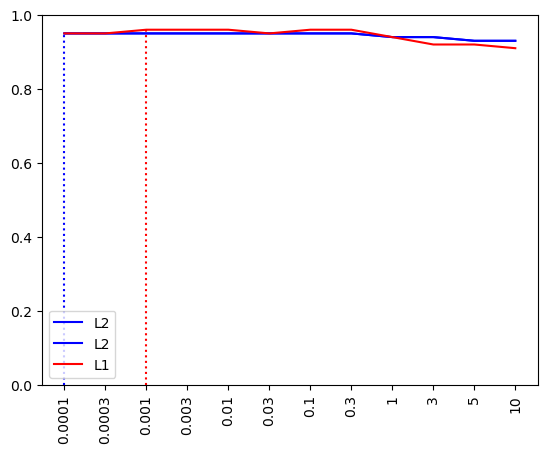

In [54]:
#plot the accuracy curve
plt.plot(range(0,len(lambda_vals)), l2_acc, color='b', label='L2')
plt.plot(range(0,len(lambda_vals)), l1_acc, color='r', label='L1')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(lambda_vals)), lambda_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_l2, max_index_l2), (0, l2_acc[max_index_l2]), ls='dotted', color='b')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

### Generate a classification report

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('B: ROC AUC=%.3f' % (ns_auc))
print('M: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='B')
plt.plot(lr_fpr, lr_tpr, marker='.', label='M')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<hr>

## Task-2
- Do logistic regrasstion with PCA and write classification report
- Do logistic regrasstion using L1 or L2 reguliser and write classification report

<hr>